In [2]:
# !pip install pandas plotly matplotlib pingouin nbformat ipykernel scikit-learn optuna ipywidgets gradio
!pip install pandas plotly matplotlib pingouin nbformat ipykernel scikit-learn optuna ipywidgets gradio


In [3]:
# EDA
import pandas as pd
import pingouin as pg
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Otimização de Hiperparâmetros
import optuna

In [4]:
# Carregar o Dataset
df_segmento = pd.read_csv('./datasets/dataset_segmento_clientes.csv')

### EDA

In [5]:
# Estrutura do Dataset
df_segmento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   atividade_economica     500 non-null    object 
 1   faturamento_mensal      500 non-null    float64
 2   numero_de_funcionarios  500 non-null    int64  
 3   localizacao             500 non-null    object 
 4   idade                   500 non-null    int64  
 5   inovacao                500 non-null    int64  
 6   segmento_de_cliente     500 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


In [6]:
# Visularizando os dados
df_segmento.head(10)

,atividade_economica,faturamento_mensal,numero_de_funcionarios,localizacao,idade,inovacao,segmento_de_cliente
0,Comércio,713109.95,12,Rio de Janeiro,6,1,Bronze
1,Comércio,790714.38,9,São Paulo,15,0,Bronze
2,Comércio,1197239.33,17,São Paulo,4,9,Silver
3,Indústria,449185.78,15,São Paulo,6,0,Starter
4,Agronegócio,1006373.16,15,São Paulo,15,8,Silver
5,Serviços,1629562.41,16,Rio de Janeiro,11,4,Silver
6,Serviços,771179.95,13,Vitória,0,1,Starter
7,Serviços,707837.61,16,São Paulo,10,6,Silver
8,Comércio,888983.66,17,Belo Horizonte,10,1,Bronze
9,Indústria,1098512.64,13,Rio de Janeiro,9,3,Bronze


In [7]:
# Valores possíveis - Variáveis Categóricas (Exemplo: atividade_economica)
df_segmento['atividade_economica'].unique()

array(['Comércio', 'Indústria', 'Agronegócio', 'Serviços'], dtype=object)

In [8]:
# Valores possíveis - Variáveis Categóricas (Exemplo: localidade)
df_segmento['localizacao'].unique()

array(['Rio de Janeiro', 'São Paulo', 'Vitória', 'Belo Horizonte'],
      dtype=object)

In [9]:
# Valores possíveis - Variáveis Categóricas (Exemplo: segmento_de_cliente)
df_segmento['segmento_de_cliente'].unique()

array(['Bronze', 'Silver', 'Starter', 'Gold'], dtype=object)

In [10]:
# Valores possíveis - Variáveis Categóricas (Exemplo: inovacao)
df_segmento['inovacao'].unique()

array([1, 0, 9, 8, 4, 6, 3, 7, 5, 2])

In [11]:
# Distribuição da variável Segmento de Cliente (Target)
contagem_target = df_segmento.value_counts('segmento_de_cliente')
contagem_target

segmento_de_cliente
Silver     260
Bronze     202
Starter     22
Gold        16
Name: count, dtype: int64

In [12]:
# Criar uma lista ordenada do target
lista_segmentos = ['Starter', 'Bronze', 'Silver', 'Gold']

In [13]:
# Distribuição da variável Target - Contagem
px.bar(contagem_target, color=contagem_target.index, category_orders={'segmento_de_cliente': lista_segmentos})

In [14]:
# Distribuição da variável Target - Percentual
percentual_target = contagem_target / len(df_segmento) * 100
px.bar(percentual_target, color=percentual_target.index, category_orders={'segmento_de_cliente': lista_segmentos})

In [15]:
# Distribuição da variável Localização - Percentual
percentual_localizacao = df_segmento['localizacao'].value_counts(normalize=True) * 100
px.bar(percentual_localizacao, color=percentual_localizacao.index, category_orders={'localizacao': percentual_localizacao.index})

In [16]:
# Distribuição de Variável Atividade Econômica - Percentual
percentual_atividade_economica = df_segmento['atividade_economica'].value_counts(normalize=True) * 100
px.bar(percentual_atividade_economica, color=percentual_atividade_economica.index, category_orders={'atividade_economica': percentual_atividade_economica.index})

In [18]:
# Distribuição de Variável Inovação - Percentual
percentual_inovacao = df_segmento['inovacao'].value_counts(normalize=True) * 100
px.bar(percentual_inovacao, color=percentual_inovacao.index, category_orders={'inovacao': percentual_inovacao.index})

In [19]:
# Tabela de Contingência entre Localização e Target
crosstab_localizacao = pd.crosstab(df_segmento['localizacao'], df_segmento['segmento_de_cliente'], margins=True)[lista_segmentos].reset_index()

tabela_localizacao = ff.create_table(crosstab_localizacao)

tabela_localizacao.show()

In [20]:
# Tabela de Contingência entre Atividade Econômica e Target
crosstab_atividade_economica = pd.crosstab(df_segmento['atividade_economica'], df_segmento['segmento_de_cliente'], margins=True)[lista_segmentos].reset_index()

tabela_atividade_economica = ff.create_table(crosstab_atividade_economica)

tabela_atividade_economica.show()

In [21]:
# Tabela de Contingência entre Inovação e Target
crosstab_inovacao = pd.crosstab(df_segmento['inovacao'], df_segmento['segmento_de_cliente'], margins=True)[lista_segmentos].reset_index()

tabela_inovacao = ff.create_table(crosstab_inovacao)

tabela_inovacao.show()

In [22]:
# Distribuição Idade da Empresa
px.histogram(df_segmento, x='idade')

In [23]:
# Distribuição Faturamento Mensal
px.histogram(df_segmento, x='faturamento_mensal')

In [24]:
# BoxPlot entre Idade e Segmento
px.box(df_segmento, x='segmento_de_cliente', y='idade', color='segmento_de_cliente', category_orders={'segmento_de_cliente': lista_segmentos})

In [25]:
# BoxPlot entre Faturamento e Segmento
px.box(df_segmento, x='segmento_de_cliente', y='faturamento_mensal', color='segmento_de_cliente', category_orders={'segmento_de_cliente': lista_segmentos})

In [ ]:
# Teste de Qui-quadrado de Pearson
# H0: As variáveis são independentes
# H1: As variáveis são dependentes
# Teste de Qui-quadrado de Pearson entre Localização e Target
# Se o p-valor for menor que 0.05, rejeitamos a hipótese nula (H0)
# Se o p-valor for maior que 0.05, não rejeitamos a hipótese nula (H0)

valor_esperado, valor_observado, estatisticas = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'localizacao')

/home/yuri/.local/share/virtualenvs/classificacao_arvore_decisao-p0LKx4Um/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on observed frequencies.

/home/yuri/.local/share/virtualenvs/classificacao_arvore_decisao-p0LKx4Um/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on expected frequencies.



In [27]:
# Valor Esperado
# É a tabela de frequências esperadas sob a hipótese nula de independência
# É calculada multiplicando a soma das linhas e colunas e dividindo pelo total
valor_esperado

localizacao,Belo Horizonte,Rio de Janeiro,São Paulo,Vitória
segmento_de_cliente,,,,
Bronze,44.844,52.924,48.884,55.348
Gold,3.552,4.192,3.872,4.384
Silver,57.720,68.120,62.920,71.240
Starter,4.884,5.764,5.324,6.028


In [28]:
# Valor Observado
# É a tabela de frequências observadas
# É a tabela original
valor_observado

localizacao,Belo Horizonte,Rio de Janeiro,São Paulo,Vitória
segmento_de_cliente,,,,
Bronze,39,62,45,56
Gold,4,3,5,4
Silver,63,60,65,72
Starter,5,6,6,5


In [29]:
# Estatísticas
# É o valor do teste de Qui-quadrado
# É calculado como a soma dos quadrados das diferenças entre os valores observados e esperados, dividido pelos valores esperados
estatisticas.round(5)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00000,5.19335,9.0,0.81714,0.05884,0.11369
1,cressie-read,0.66667,5.19198,9.0,0.81726,0.05883,0.11367
2,log-likelihood,0.00000,5.19713,9.0,0.81680,0.05886,0.11374
3,freeman-tukey,-0.50000,5.20798,9.0,0.81581,0.05892,0.11390
4,mod-log-likelihood,-1.00000,5.22494,9.0,0.81428,0.05902,0.11414
5,neyman,-2.00000,5.27777,9.0,0.80945,0.05932,0.11490


In [ ]:
# Teste de Qui-quadrado de Pearson
# H0: As variáveis são independentes
# H1: As variáveis são dependentes
# Teste de Qui-quadrado de Pearson entre Atividade Econômica e Target
# Se o p-valor for menor que 0.05, rejeitamos a hipótese nula (H0)
# Se o p-valor for maior que 0.05, não rejeitamos a hipótese nula (H0)

valor_esperado, valor_observado, estatisticas = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'atividade_economica')

/home/yuri/.local/share/virtualenvs/classificacao_arvore_decisao-p0LKx4Um/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on observed frequencies.

/home/yuri/.local/share/virtualenvs/classificacao_arvore_decisao-p0LKx4Um/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on expected frequencies.

/home/yuri/.local/share/virtualenvs/classificacao_arvore_decisao-p0LKx4Um/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7344: RuntimeWarning:

divide by zero encountered in power

/home/yuri/.local/share/virtualenvs/classificacao_arvore_decisao-p0LKx4Um/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7344: RuntimeWarning:

invalid value encountered in multiply

/home/yuri/.local/share/virtualenvs/classificacao_arvore_decisao-p0LKx4Um/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7341: RuntimeWarning:

divide by zero encountered in divide



In [32]:
# Valor Esperado
# É a tabela de frequências esperadas sob a hipótese nula de independência
# É calculada multiplicando a soma das linhas e colunas e dividindo pelo total
valor_esperado

atividade_economica,Agronegócio,Comércio,Indústria,Serviços
segmento_de_cliente,,,,
Bronze,47.672,56.156,49.288,48.884
Gold,3.776,4.448,3.904,3.872
Silver,61.360,72.280,63.440,62.920
Starter,5.192,6.116,5.368,5.324


In [33]:
# Valor Observado
# É a tabela de frequências observadas
# É a tabela original
valor_observado

atividade_economica,Agronegócio,Comércio,Indústria,Serviços
segmento_de_cliente,,,,
Bronze,47,56,50,49
Gold,7,5,4,0
Silver,57,75,63,65
Starter,7,3,5,7


In [34]:
# Estatísticas
# É o valor do teste de Qui-quadrado
# É calculado como a soma dos quadrados das diferenças entre os valores observados e esperados, dividido pelos valores esperados
estatisticas.round(5)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00000,9.96998,9.0,0.35292,0.08153,0.18948
1,cressie-read,0.66667,10.60995,9.0,0.30339,0.08410,0.20060
2,log-likelihood,0.00000,13.54637,9.0,0.13940,0.09503,0.25375
3,freeman-tukey,-0.50000,NaN,9.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.00000,inf,9.0,0.00000,inf,NaN
5,neyman,-2.00000,NaN,9.0,NaN,NaN,NaN


In [35]:
# Teste de Qui-quadrado de Pearson
# H0: As variáveis são independentes
# H1: As variáveis são dependentes
# Teste de Qui-quadrado de Pearson entre Inovação e Target
# Se o p-valor for menor que 0.05, rejeitamos a hipótese nula (H0)
# Se o p-valor for maior que 0.05, não rejeitamos a hipótese nula (H0)
valor_esperado, valor_observado, estatisticas = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'inovacao')


/home/yuri/.local/share/virtualenvs/classificacao_arvore_decisao-p0LKx4Um/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on observed frequencies.

/home/yuri/.local/share/virtualenvs/classificacao_arvore_decisao-p0LKx4Um/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning:

Low count on expected frequencies.

/home/yuri/.local/share/virtualenvs/classificacao_arvore_decisao-p0LKx4Um/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7344: RuntimeWarning:

divide by zero encountered in power

/home/yuri/.local/share/virtualenvs/classificacao_arvore_decisao-p0LKx4Um/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7344: RuntimeWarning:

invalid value encountered in multiply

/home/yuri/.local/share/virtualenvs/classificacao_arvore_decisao-p0LKx4Um/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7341: RuntimeWarning:

divide by zero encountered in divide



In [36]:
# Valor Esperado
valor_esperado

inovacao,0,1,2,3,4,5,6,7,8,9
segmento_de_cliente,,,,,,,,,,
Bronze,21.008,23.028,22.624,19.392,17.372,17.372,21.816,21.412,18.988,18.988
Gold,1.664,1.824,1.792,1.536,1.376,1.376,1.728,1.696,1.504,1.504
Silver,27.040,29.640,29.120,24.960,22.360,22.360,28.080,27.560,24.440,24.440
Starter,2.288,2.508,2.464,2.112,1.892,1.892,2.376,2.332,2.068,2.068


In [37]:
# Valor Observado
valor_observado

inovacao,0,1,2,3,4,5,6,7,8,9
segmento_de_cliente,,,,,,,,,,
Bronze,36,44,32,22,12,14,15,12,9,6
Gold,0,0,0,0,0,3,0,5,4,4
Silver,10,5,20,25,30,25,38,36,34,37
Starter,6,8,4,1,1,1,1,0,0,0


In [38]:
# Estatísticas
estatisticas.round(5)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00000,164.29399,27.0,0.0,0.33095,0.99850
1,cressie-read,0.66667,165.49946,27.0,0.0,0.33216,0.99861
2,log-likelihood,0.00000,181.48878,27.0,0.0,0.34784,0.99951
3,freeman-tukey,-0.50000,NaN,27.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.00000,inf,27.0,0.0,inf,NaN
5,neyman,-2.00000,NaN,27.0,NaN,NaN,NaN


As variáveis localização e segmento de cliente são independentes. Qui-Quadrado (p-value = 0.81714)

As variáveis atividade econômica e segmento de cliente são independentes. Qui-Quadrado (p-value = 0.35292)

As variáveis inovação e segmento não são independentes. Qui-Quadrado (p-value = 0.0)

### Treinamento do Modelo

In [39]:
# Separar X e y
X = df_segmento.drop(columns=['segmento_de_cliente'])
y = df_segmento['segmento_de_cliente']

In [40]:
# Pipeline
# OneHotEncode nas variáveis categóricas
# Treinamento do Modelo

# Lista de variáveis categóricas
catergorical_features = ['atividade_economica', 'localizacao']

# Criar um transformador de variáveis categórias usando OneHotEncoder
catergorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', catergorical_transformer, catergorical_features)
    ]
)

# Pipeline com Pre-Processor e o Modelo de Árvore de Decisão
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

### Validação Cruzada

In [42]:
# Treinar o modelo com Validação Cruzada, usando StratifiedKFold, dado que as classes estão desbalanceadas

cv_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=51)
metrics_result = cross_validate(dt_model, X, y, cv=cv_folds, scoring=['accuracy'], return_estimator=True)

In [43]:
# Mostrar o Retorno do Cross-Validation
metrics_result

{'fit_time': array([0.00665116, 0.00493407, 0.00450516]),
 'score_time': array([0.00442362, 0.00328588, 0.00343204]),
 'estimator': [Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
                                                                     SimpleImputer(strategy='most_frequent')),
                                                                    ('onehot',
                                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                                    ['atividade_economica',
                                                     'localizacao'])])),
                  ('classifier', DecisionTreeClassifier())]),
  Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
        

In [44]:
# Média da Acurácia, considerando os 3 splits
metrics_result['test_accuracy'].mean()

np.float64(0.4739917754851743)

In [ ]:
# Acurácia
# Total de previsões corretas / total de previsões

### Métricas

In [45]:
y_pred = cross_val_predict(dt_model, X, y, cv=cv_folds)

In [46]:
# Avaliar o desempenho do modelo
classification_report_str = classification_report(y, y_pred)

print(f"Classification Report:\n{classification_report_str}")

Classification Report:
              precision    recall  f1-score   support

      Bronze       0.41      0.36      0.38       202
        Gold       0.00      0.00      0.00        16
      Silver       0.51      0.63      0.57       260
     Starter       0.00      0.00      0.00        22

    accuracy                           0.47       500
   macro avg       0.23      0.25      0.24       500
weighted avg       0.43      0.47      0.45       500



/home/yuri/.local/share/virtualenvs/classificacao_arvore_decisao-p0LKx4Um/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/yuri/.local/share/virtualenvs/classificacao_arvore_decisao-p0LKx4Um/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/yuri/.local/share/virtualenvs/classificacao_arvore_decisao-p0LKx4Um/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



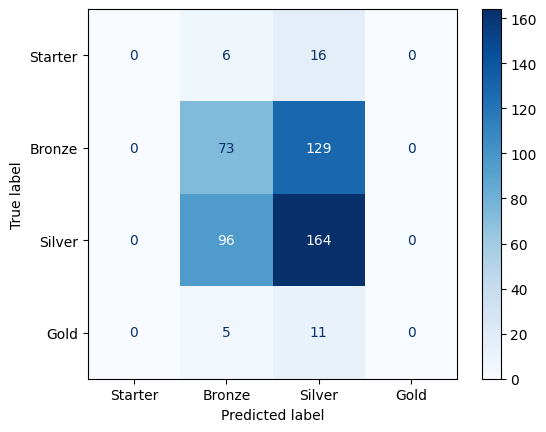

In [47]:
# Matriz de Confusão
confusion_matrix_result = confusion_matrix(y, y_pred, labels=lista_segmentos)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=lista_segmentos)
disp.plot(cmap=plt.cm.Blues)

### Tuning de Hiperparâmetros

In [ ]:
# Ajustar hiperparâmetros do modelo usando Optuna
# min_samples_leaf: Número mínimo de amostras necessárias para estar em um nó folha
# min_samples_split: Número mínimo de amostras necessárias para dividir um nó interno
# max_depth: Profundidade máxima da árvore
# max_features: Número máximo de recursos a serem considerados para encontrar a melhor divisão

def decisiontree_optuna(trial):

    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_depth = trial.suggest_int('max_depth', 2, 8)

    dt_model.set_params(
        classifier__min_samples_leaf=min_samples_leaf,
        classifier__max_depth=max_depth
    )

    scores = cross_val_score(dt_model, X, y, cv=cv_folds, scoring='accuracy')

    return scores.mean()

In [54]:
# Executar a automação de experimentos
study_decisiontree = optuna.create_study(direction='maximize')
study_decisiontree.optimize(decisiontree_optuna, n_trials=200)

[I 2025-04-21 17:31:22,986] A new study created in memory with name: no-name-022e3959-22ad-48d4-a640-6f421bcfe93d
[I 2025-04-21 17:31:23,023] Trial 0 finished with value: 0.4740518962075848 and parameters: {'min_samples_leaf': 1, 'max_depth': 2}. Best is trial 0 with value: 0.4740518962075848.
[I 2025-04-21 17:31:23,058] Trial 1 finished with value: 0.45398359906692637 and parameters: {'min_samples_leaf': 5, 'max_depth': 4}. Best is trial 0 with value: 0.4740518962075848.
[I 2025-04-21 17:31:23,089] Trial 2 finished with value: 0.4739917754851743 and parameters: {'min_samples_leaf': 11, 'max_depth': 7}. Best is trial 0 with value: 0.4740518962075848.
[I 2025-04-21 17:31:23,121] Trial 3 finished with value: 0.4739917754851743 and parameters: {'min_samples_leaf': 10, 'max_depth': 7}. Best is trial 0 with value: 0.4740518962075848.
[I 2025-04-21 17:31:23,153] Trial 4 finished with value: 0.46997571122814613 and parameters: {'min_samples_leaf': 17, 'max_depth': 6}. Best is trial 0 with val

In [56]:
# Mostrar os melhores hiperparâmetros
best_params = study_decisiontree.best_params
best_accuracy = study_decisiontree.best_value

print(f'Melhores Hiperparâmetros: {best_params}')
print(f'Melhor Acurácia: {best_accuracy}')

Melhores Hiperparâmetros: {'min_samples_leaf': 1, 'max_depth': 2}
Melhor Acurácia: 0.4740518962075848


### Visuzalicar Árvore

In [57]:
# Preparar o Conjunto de Dados para treinar e conseguir visualizar a árvore
X_train_tree = X.copy()
X_train_tree['localizacao_label'] = X_train_tree.localizacao.astype('category').cat.codes
X_train_tree['atividade_economica_label'] = X_train_tree.atividade_economica.astype('category').cat.codes
X_train_tree.drop(columns=['atividade_economica', 'localizacao'], axis=1, inplace=True)
X_train_tree.rename(columns={'atividade_economica_label': 'atividade_economica', 'localizacao_label': 'localizacao'}, inplace=True)
X_train_tree.head(10)


,faturamento_mensal,numero_de_funcionarios,idade,inovacao,localizacao,atividade_economica
0,713109.95,12,6,1,1,1
1,790714.38,9,15,0,2,1
2,1197239.33,17,4,9,2,1
3,449185.78,15,6,0,2,2
4,1006373.16,15,15,8,2,0
5,1629562.41,16,11,4,1,3
6,771179.95,13,0,1,3,3
7,707837.61,16,10,6,2,3
8,888983.66,17,10,1,0,1
9,1098512.64,13,9,3,1,2


In [58]:
# Treinar o modelo com o conjunto de hiperparâmetros otimizados

clf_decision_tree = DecisionTreeClassifier(
    min_samples_leaf=study_decisiontree.best_params['min_samples_leaf'],
    max_depth=study_decisiontree.best_params['max_depth']
)

y_train_tree = y.copy()

clf_decision_tree.fit(X_train_tree, y_train_tree)

DecisionTreeClassifier(max_depth=2)

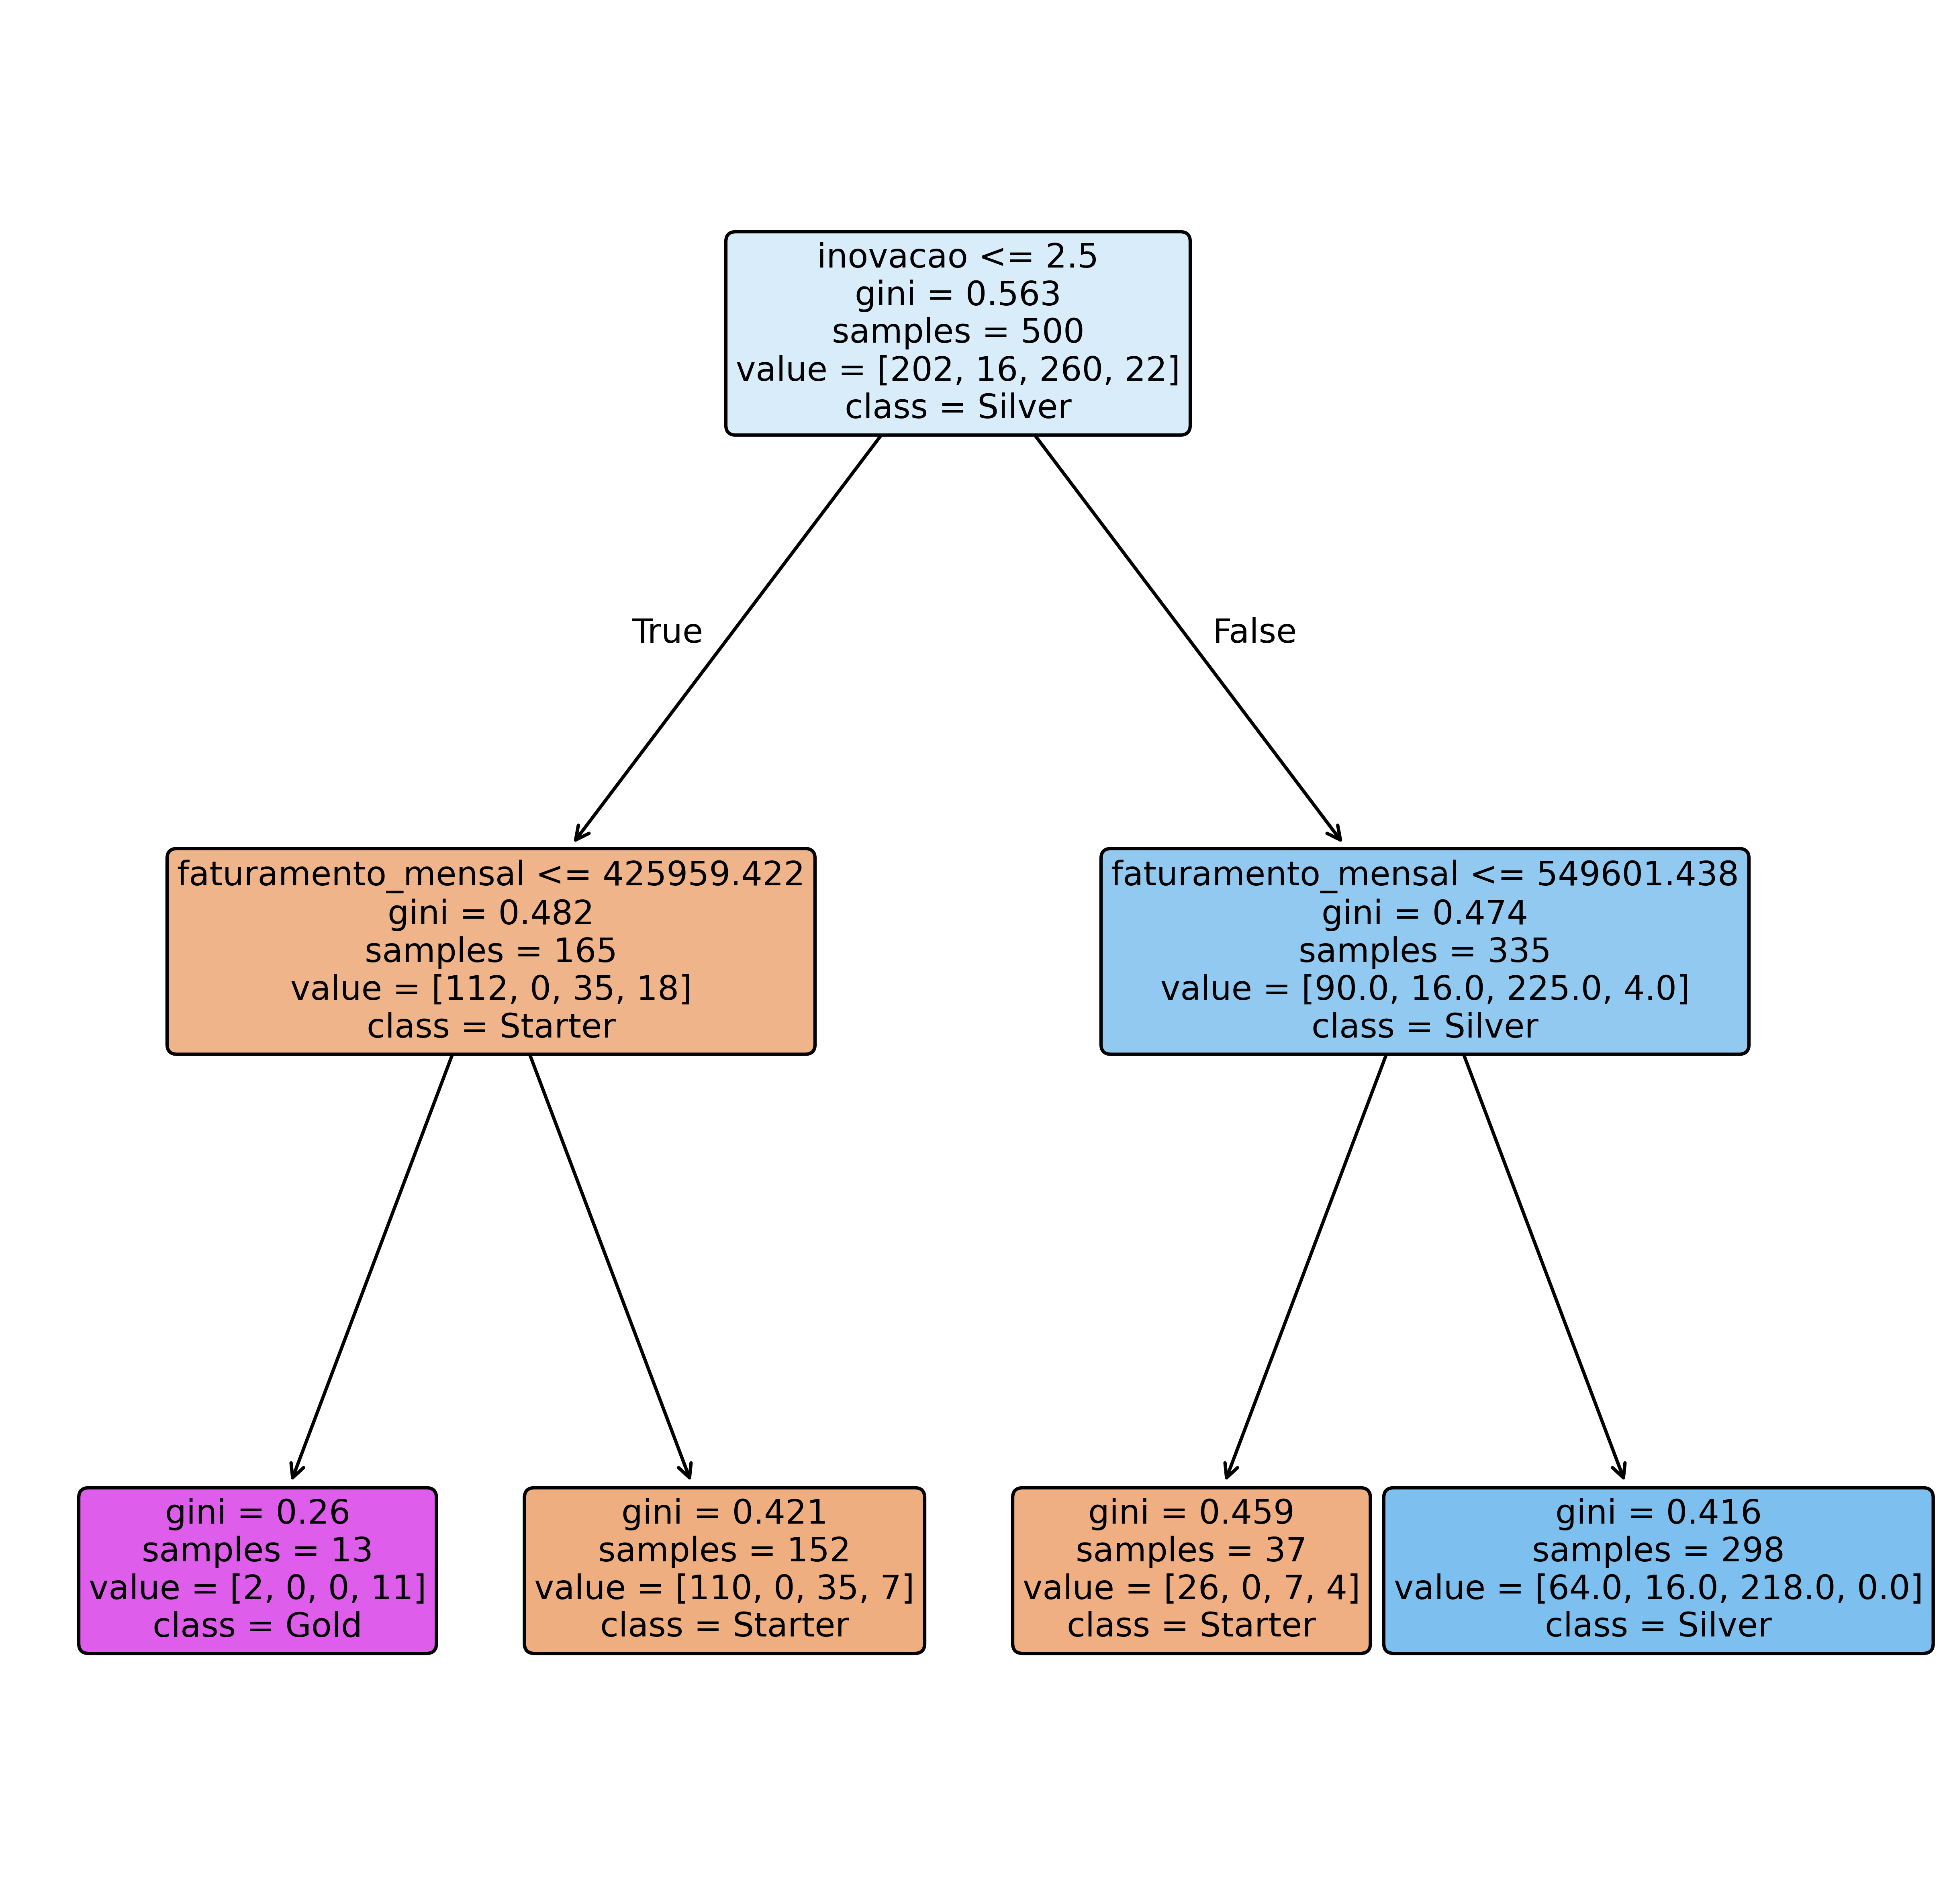

In [60]:
# Visualizar Árvore de Decisão com Plot Tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=600)

plot_tree(clf_decision_tree,
          feature_names=X_train_tree.columns.to_numpy(),
          class_names=lista_segmentos,
          filled=True,
          fontsize=10,
          rounded=True,
          ax=axes)
plt.show()

### Salvar Modelo

In [62]:
import joblib

# Criar um pipeline com o modelo otimizado
dt_model_otimizado = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        min_samples_leaf=study_decisiontree.best_params['min_samples_leaf'],
        max_depth=study_decisiontree.best_params['max_depth']
    ))
])

# Treinar o modelo com o pipeline otimizado
dt_model_otimizado.fit(X, y)

# Salvar o modelo otimizado
joblib.dump(dt_model_otimizado, 'modelo_classificacao_decision_tree.pkl')

['modelo_classificacao_decision_tree.pkl']

### Entregar modelo como App de Predição Batch (Por arquivo)

In [64]:
import gradio as gr

modelo = joblib.load('./modelo_classificacao_decision_tree.pkl')

def predict(arquivo):
    df_empresas = pd.read_csv(arquivo.name)
    y_pred = modelo.predict(df_empresas)
    df_segmentos = pd.DataFrame(y_pred, columns=['segmento_de_cliente'])
    df_predicoes = pd.concat([df_empresas, df_segmentos], axis=1)
    df_predicoes.to_csv('./predicoes.csv', index=False)
    return './predicoes.csv'

demo = gr.Interface(
    predict,
    gr.File(file_types=[".csv"], label="Carregar arquivo CSV"),
    "file"
)

demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://f5104bcfe4f91babca.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
